# Analysis of Sample Data

In [1]:
import sys
sys.path.append('/home/g/code/ds/sentiment')

from collections import Counter

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sentiment_analysis.database import engine


green = '#008f41'
plt.style.use('dark_background')

df = pd.read_sql_table('game_review', engine)
df.head()

,id,user_id,game_id,rating,comment,comment_lower
0,1,25308,37111,8.5,++++ Thematic +++ Bluff - Many randomness I ...,++++ thematic +++ bluff - many randomness i ...
1,2,54313,12,8.0,"""well, that ugly artwork certainly helped imme...","""well, that ugly artwork certainly helped imme..."
2,3,38165,50,8.0,LOVE this game! If only the GF would play it ...,love this game! if only the gf would play it ...
3,4,56936,1198,5.0,"SET is a good game, in small doses (in my case...","set is a good game, in small doses (in my case..."
4,5,47675,164153,6.0,"So much better than Descent. Better theme, imp...","so much better than descent. better theme, imp..."


# Rating Column Analysis

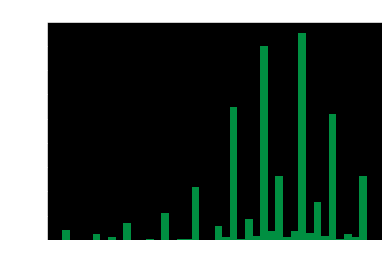

In [2]:
num_bins = 40

plt.hist(df.rating, num_bins, facecolor=green)

plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

plt.show()

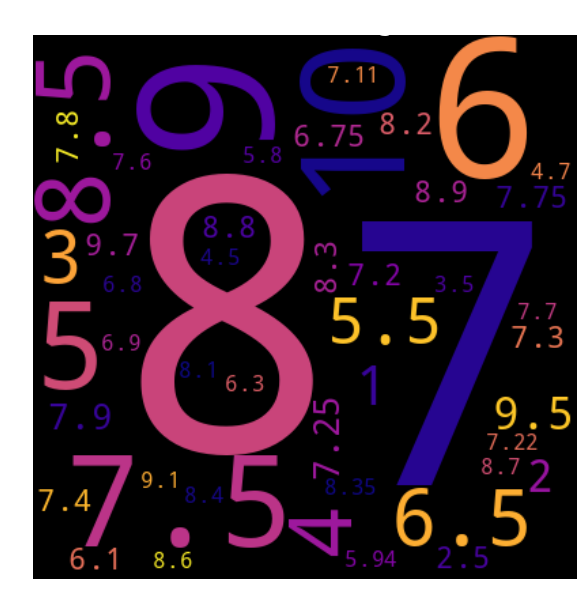

In [3]:
wc = WordCloud(width=400, height=400,colormap='plasma').generate_from_frequencies(
    dict(
        Counter([ str(int(v) if v.is_integer() else v) for v in df.rating.tolist() ])
    )
)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Game Ratings', fontsize=30)
plt.axis('off');

# Comment Column Analysis

Significant word count: 3943


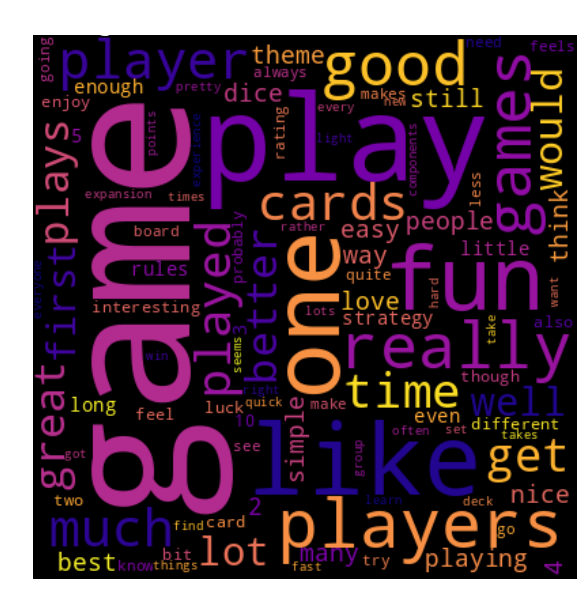

In [4]:
import string
import re
import nltk as nl
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))

words = Counter([w for w in nl.RegexpTokenizer(r'\w+').tokenize(df.comment.str.cat(sep=' ').lower()) if w not in sw])

print('Significant word count: %d' % len(words))

wc = WordCloud(width=400, height=400,colormap='plasma').generate_from_frequencies(dict(words.most_common(100)))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.title('Significant Words in Comments', fontsize=30)
plt.axis('off');

In [5]:
wdf = pd.read_sql_table('sig_word', engine)
wdf.head()

,id,word,count,game_count,median,median_q25,median_q50,median_q75,mode,mean,stdev,pstdev,variance,pvariance
0,1,camelot,1,1,8.4,8.40,8.4,8.40,8.4,8.400,NaN,0.00000,NaN,0.00000
1,2,look,13,12,7.0,6.50,7.0,7.50,7.0,6.558,1.59476,1.53220,2.54327,2.34763
2,3,waterdeep,3,3,7.5,6.75,7.5,8.75,NaN,7.833,2.02073,1.64992,4.08333,2.72222
3,4,aquaretto,1,1,6.0,6.00,6.0,6.00,6.0,6.000,NaN,0.00000,NaN,0.00000
4,5,pointing,1,1,8.0,8.00,8.0,8.00,8.0,8.000,NaN,0.00000,NaN,0.00000


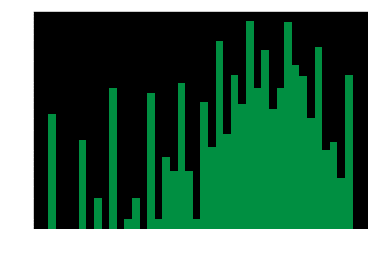

In [6]:
num_bins = 40

_, ax = plt.subplots()
ax.set_yscale('log')
plt.hist(wdf.median_q50, num_bins, facecolor=green)
plt.show()

In [7]:
from sentiment_analysis.entities import SigWordUse
oh = SigWordUse.onehot()
oh.iloc[:,1:]

,aaahhh,aarg,abbey,abilities,ability,able,aboms,absolute,absolutely,abstract,...,young,younger,youre,yspahan,yup,zertz,zman,zombie,zombies,zooleretto
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Comment length mean:  227.81582054309328
Comment length min:   6
Comment length max:   7977


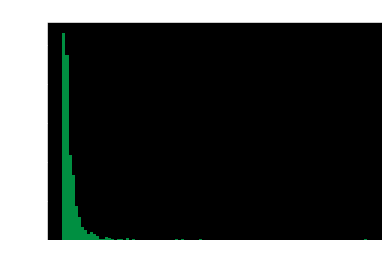

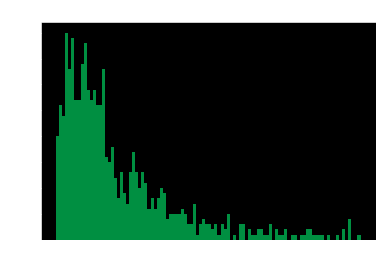

In [8]:
len_df = df.comment.str.len()

print('Comment length mean: ', len_df.mean())
print('Comment length min:  ', len_df.min())
print('Comment length max:  ', len_df.max())

num_bins = 100

plt.hist(len_df, num_bins, facecolor=green)

plt.title('Comment length')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

upper_comment_bound = np.percentile(len_df, [0, 97.5])[1]

plt.hist(len_df[len_df < upper_comment_bound].dropna(), num_bins, facecolor=green)

plt.title('Comment length (97.5 percentile)')
plt.xlabel('Length of comment')
plt.ylabel('Number of Reviews')
plt.show()

# GameID Column Analysis

Review count mean:  2.630434782608696
Review count min:   1
Review count max:   16


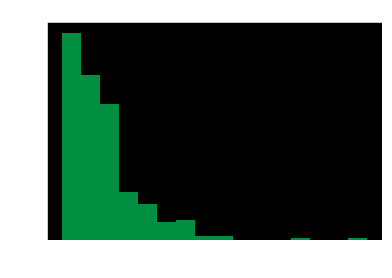

In [7]:
gameID_df = pd.DataFrame({'review_count': list(Counter(df.game_id).values()) })

print('Review count mean: ', gameID_df.review_count.mean())
print('Review count min:  ', gameID_df.review_count.min())
print('Review count max:  ', gameID_df.review_count.max())

plt.hist(gameID_df.review_count, gameID_df.review_count.max(), facecolor=green)
plt.title('Review count per game')
plt.xlabel('Review count')
plt.ylabel('Number of games')
plt.show()

# UserID Column Analysis

Review count mean:  1.0204819277108435
Review count min:   1
Review count max:   2


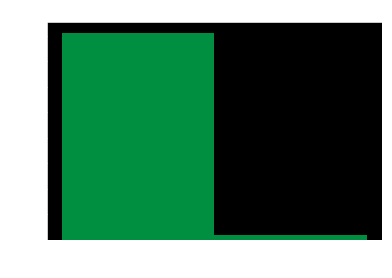

In [9]:
userID_df = pd.DataFrame({'review_count': list(Counter(df.user_id).values())})

print('Review count mean: ', userID_df.review_count.mean())
print('Review count min:  ', userID_df.review_count.min())
print('Review count max:  ', userID_df.review_count.max())

plt.hist(userID_df.review_count, userID_df.review_count.max(), facecolor=green)
plt.title('Number of user Reviews')
plt.xlabel('Number of users')
plt.xticks(range(userID_df.review_count.min(), userID_df.review_count.max() + 1))
plt.ylabel('Review count')
plt.show()

# Comment x Rating Analysis

In [11]:
num_bins = 40


d = pd.cut(df.rating, 20)


Interval(8.65, 9.1, closed='right')